In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

In [6]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [9]:
# Figure out the structure of dataset

train_set_x_orig.shape, train_set_y.shape

((209, 64, 64, 3), (1, 209))

In [13]:
test_set_x_orig.shape, test_set_y.shape

((50, 64, 64, 3), (1, 50))

In [11]:
print(classes)

[b'non-cat' b'cat']


In [15]:
# Data Preprocessing

# Reshape the dataset

train_set_x_flatten = train_set_x_orig.reshape((train_set_x_orig.shape[0], -1)).T
test_set_x_flatten = test_set_x_orig.reshape((test_set_x_orig.shape[0], -1)).T

In [16]:
# Check the shape of the revised dataset

train_set_x_flatten.shape, test_set_x_flatten.shape

((12288, 209), (12288, 50))

In [17]:
# Standardize the dataset
# max - min = 255 - 0 = 255

train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [18]:
# initialize_with_zeros

def sigmoid(z):
    
    a = 1 / (1 + np.exp(-z))
    
    return a

def initialize_param(dim):
    
    w = np.zeros((dim, 1))
    b = 0
    
    return w, b

In [21]:
# forward and backward propagation

def propagate(w, b, X, Y):
    
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """ 
    
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/m) * np.sum( Y * np.log(A) + (1 - Y) * np.log(1 - A) )
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [46]:
# Optimiaztion

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    num_iterations -- number of iterations
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Return:
    params --
    grads --
    cost --
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

In [35]:
# Prediction

def predict(w, b, X):

    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape((X.shape[0], 1))
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(m):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
    
    return Y_prediction

In [31]:
# modeling

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate= 0.5, print_cost = False):
    
    # Initialize parameters
    w, b = initialize_param(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [53]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.002, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.555752
Cost after iteration 200: 0.506847
Cost after iteration 300: 0.471079
Cost after iteration 400: 0.442324
Cost after iteration 500: 0.418139
Cost after iteration 600: 0.397247
Cost after iteration 700: 0.378867
Cost after iteration 800: 0.362480
Cost after iteration 900: 0.347718
Cost after iteration 1000: 0.334308
Cost after iteration 1100: 0.322043
Cost after iteration 1200: 0.310759
Cost after iteration 1300: 0.300326
Cost after iteration 1400: 0.290639
Cost after iteration 1500: 0.281610
Cost after iteration 1600: 0.273167
Cost after iteration 1700: 0.265247
Cost after iteration 1800: 0.257798
Cost after iteration 1900: 0.250775
train accuracy: 95.69377990430623 %
test accuracy: 74.0 %


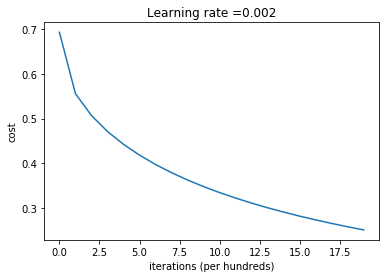

In [54]:
# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()